#ENTREGA 1 - MODELOS 1 - 2025.1
##UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia
##Exploración
Carga, inspección y algunas exploraciones sencillas de los datos.

In [1]:
!pip install kaggle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [5]:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [6]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [11]:
tr = pd.read_csv("train.csv")
print("Rows and columns", tr.shape)

Rows and columns (692500, 21)


##DataFrame

In [20]:
tr.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


##Distribución del rendimiento global

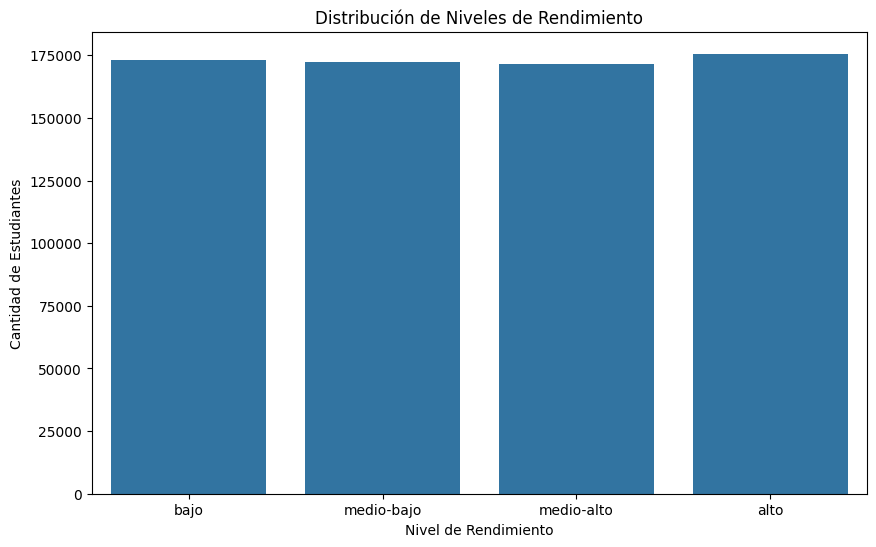

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=tr, x='RENDIMIENTO_GLOBAL', order=['bajo', 'medio-bajo', 'medio-alto', 'alto'])
plt.title('Distribución de Niveles de Rendimiento')
plt.xlabel('Nivel de Rendimiento')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

##Rendimiento global porcentualmente

In [18]:
print(tr['RENDIMIENTO_GLOBAL'].value_counts(normalize=True).sort_index()*100)

RENDIMIENTO_GLOBAL
alto          25.360144
bajo          24.980072
medio-alto    24.782527
medio-bajo    24.877256
Name: proportion, dtype: float64


##Departamentos con más estudiantes

                        CANTIDAD
ESTU_PRGM_DEPARTAMENTO          
BOGOTÁ                    282159
ANTIOQUIA                  83607
VALLE                      44588
ATLANTICO                  41020
SANTANDER                  28828
NORTE SANTANDER            22588
BOLIVAR                    20629
BOYACA                     14048
CUNDINAMARCA               14018
NARIÑO                     13454
RISARALDA                  12679
CORDOBA                    12188
TOLIMA                     11921
CALDAS                     11640
CAUCA                      11471
HUILA                       9995
MAGDALENA                   9512
SUCRE                       8674
CESAR                       8279
QUINDIO                     8229
META                        7910
LA GUAJIRA                  4778
CHOCO                       4289
CAQUETA                     2659
CASANARE                    1852
PUTUMAYO                     795
ARAUCA                       589
AMAZONAS                      40
GUAVIARE  

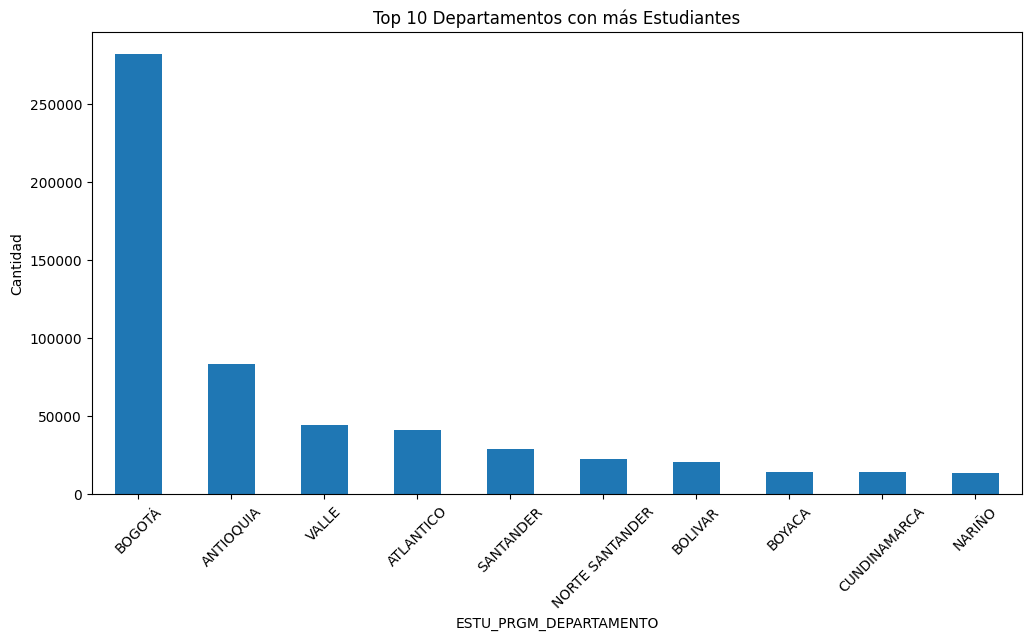

In [24]:
print(tr['ESTU_PRGM_DEPARTAMENTO'].value_counts().sort_values(ascending=False).to_frame('CANTIDAD'))

plt.figure(figsize=(12, 6))
tr['ESTU_PRGM_DEPARTAMENTO'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Departamentos con más Estudiantes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

#Distribución de rendimiento por departamento

In [25]:
tabla_cruzada = pd.crosstab(
    index=tr['ESTU_PRGM_DEPARTAMENTO'],
    columns=tr['RENDIMIENTO_GLOBAL'],
    margins=True,
    margins_name='TOTAL'
)
print(tabla_cruzada)

RENDIMIENTO_GLOBAL        alto    bajo  medio-alto  medio-bajo   TOTAL
ESTU_PRGM_DEPARTAMENTO                                                
AMAZONAS                     1      17           6          16      40
ANTIOQUIA                25688   17217       21657       19045   83607
ARAUCA                      33     283          92         181     589
ATLANTICO                10165   11159        9484       10212   41020
BOGOTÁ                   77388   66721       69215       68835  282159
BOLIVAR                   3816    6577        4758        5478   20629
BOYACA                    3770    2338        4440        3500   14048
CALDAS                    3751    1916        3313        2660   11640
CAQUETA                    283     979         568         829    2659
CASANARE                   193     589         477         593    1852
CAUCA                     1981    3480        2708        3302   11471
CESAR                      944    2870        1959        2506    8279
CHOCO 

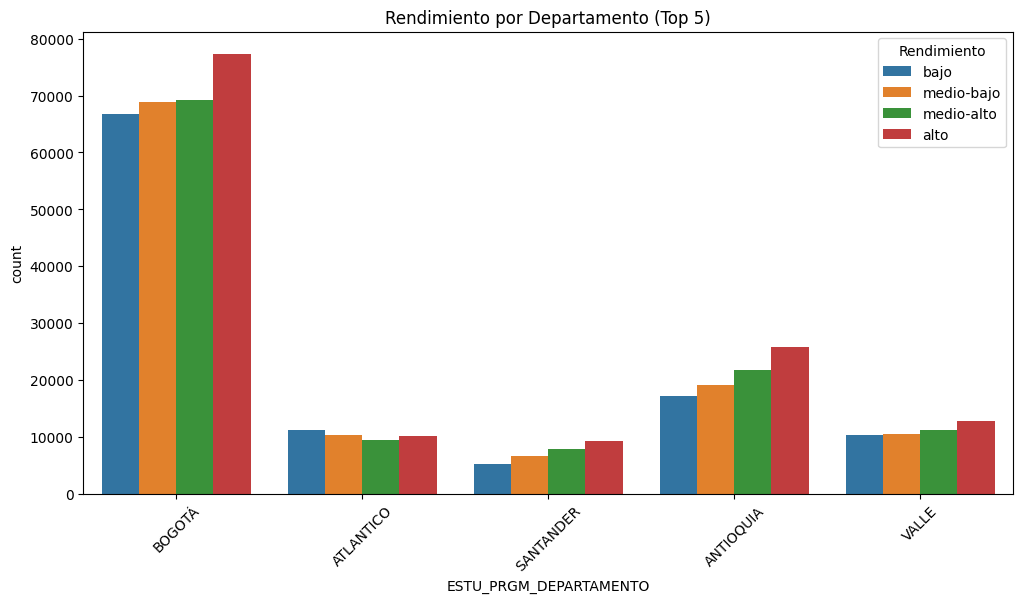

In [26]:
top_depts = tr['ESTU_PRGM_DEPARTAMENTO'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.countplot(data=tr[tr['ESTU_PRGM_DEPARTAMENTO'].isin(top_depts)],
              x='ESTU_PRGM_DEPARTAMENTO', hue='RENDIMIENTO_GLOBAL',
              hue_order=['bajo', 'medio-bajo', 'medio-alto', 'alto'])
plt.title('Rendimiento por Departamento (Top 5)')
plt.xticks(rotation=45)
plt.legend(title='Rendimiento')
plt.show()